In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from ast import literal_eval
from collections import Counter

In [2]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile.csv")

/home/chiran/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (4,6,7,9,10,12,13,15,16,18,19,20,22,24,25,26,28,30,34,35,36,37,75,76) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
user_profile = user_profile[(user_profile["ONNET_OUTGOING_Scaled"].notnull())]

In [4]:
user_profile.drop(["Unnamed: 0"],axis=1, inplace=True)

In [5]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 88 to 20022
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   event_source.hash                    3000 non-null   object 
 1   ACCOUNT_NUM.hash                     3000 non-null   object 
 2   CUSTOMER_REF.hash                    3000 non-null   object 
 3   ONNET_OUTGOING_Categorical           3000 non-null   object 
 4   ONNET_OUTGOING_Scaled                3000 non-null   float64
 5   ONNET_OUTGOING_Outlier               3000 non-null   object 
 6   ONNET_INCOMING_Categorical           2890 non-null   object 
 7   ONNET_INCOMING_Scaled                2890 non-null   float64
 8   ONNET_INCOMING_Outlier               2890 non-null   object 
 9   OFFNET_OUTGOING_Categorical          2886 non-null   object 
 10  OFFNET_OUTGOING_Scaled               2886 non-null   float64
 11  OFFNET_OUTGOING_Outlier     

## Scaling Categorical Features

In [6]:
data = user_profile.iloc[:,[4,7,10,13,16,20,26,28,62,18,23,24,29,30,32,38,41,45,49,64,66,68,70,72,74,75]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 88 to 20022
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ONNET_OUTGOING_Scaled         3000 non-null   float64
 1   ONNET_INCOMING_Scaled         2890 non-null   float64
 2   OFFNET_OUTGOING_Scaled        2886 non-null   float64
 3   OFFNET_INCOMING_Scaled        2942 non-null   float64
 4   IDD_INCOMING_Scaled           1491 non-null   float64
 5   IDD_OUTGOING_Scaled           484 non-null    float64
 6   PEO_TV_Scaled                 1135 non-null   float64
 7   BB_Scaled                     1112 non-null   float64
 8   BB_Extra_GB_Purchased_Scaled  366 non-null    float64
 9   IDD_incoming_country          1491 non-null   object 
 10  IDD_outgoing_country          484 non-null    object 
 11  Peo_TV_Package                1135 non-null   object 
 12  Location_Identifier           3000 non-null   object 
 13  G

In [7]:
data["Location_Identifier"] = data["Location_Identifier"].astype("category") # -1 recorrection
data["Location_Identifier_Scaled"] = data["Location_Identifier"].cat.codes

<ipython-input-7-cb17529bf8da>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-cb17529bf8da>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
data["Location_Identifier_Scaled"] = data["Location_Identifier_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Location_Identifier_Scaled"].unique()

<ipython-input-8-7e72dc772518>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([33, 12, 24, 16, 11,  2, 41, 27, 42, 29,  3, 22, 14, 20, 17, 28, 18,
       32, 31,  8, 34, 44, 23, 10, 26, 38, 39, 46, 15, 40, 19, 37, 30, 36,
        1,  4,  6,  0,  9, 35,  5,  7, 21, 25, 47, 13, 45, 43])

In [9]:
data["Sub_Type"] = data["Sub_Type"].astype("category")
data["Sub_Type_Scaled"] = data["Sub_Type"].cat.codes
data["Sub_Type_Scaled"].unique()

<ipython-input-9-e13cfdf50d96>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-e13cfdf50d96>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([4, 1, 3, 2, 0], dtype=int8)

In [10]:
data["IDD_incoming_country"] = data["IDD_incoming_country"].astype("category")
data["IDD_incoming_country_Scaled"] = data["IDD_incoming_country"].cat.codes

<ipython-input-10-fd72d2ad8ca9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-fd72d2ad8ca9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
data["IDD_incoming_country_Scaled"] = data["IDD_incoming_country_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["IDD_incoming_country_Scaled"].unique()

<ipython-input-11-5101508b466e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([  0, 626, 823, 280, 137,   5, 351, 256, 450, 617, 107, 497, 260,
        51, 476, 288, 333, 418, 112, 117,  60,  18, 196, 128, 620, 813,
       560, 648, 555, 837, 767, 115, 701, 226, 567, 770,  42, 820, 753,
       621, 607, 649, 219, 831, 425, 656, 818, 819, 429, 754, 619, 206,
       580, 108, 221, 216, 129, 624, 222,  45, 343, 466, 509,  49, 750,
       198, 100, 440, 839, 756, 257, 187, 739, 740, 391, 679,  88,  24,
       552, 747, 711, 554, 647, 654, 564,  98, 759, 760, 164, 375, 744,
       526, 775, 180, 302, 480, 558, 573, 549,  89, 195, 103, 124, 598,
       807, 379, 277, 613, 315, 645, 235, 563, 324, 215, 523, 289, 633,
       592,   9, 122, 710, 471, 641, 675, 438,  58,  90, 447, 121, 708,
       106, 220, 737, 719, 640, 587, 766, 559, 428,  66, 473, 771, 405,
       653, 727, 501, 707, 539, 237, 179, 304, 833, 696, 720, 805, 492,
       782, 806, 586, 214, 390, 616,  10, 541, 170, 199, 751,  50, 136,
       512, 327, 311, 655, 152, 202, 612, 140, 394, 735, 359, 17

In [12]:
data["IDD_outgoing_country"] = data["IDD_outgoing_country"].astype("category")
data["IDD_outgoing_country_Scaled"] = data["IDD_outgoing_country"].cat.codes

<ipython-input-12-b5f4ec959986>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-b5f4ec959986>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
data["IDD_outgoing_country_Scaled"] = data["IDD_outgoing_country_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["IDD_outgoing_country_Scaled"].unique()

<ipython-input-13-f1a47fc6ce37>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([162,   0, 130, 171,  67, 158, 122, 126, 119,  33, 157, 132, 155,
       111, 141,  90,  20,  98,  78,  53, 127,  99, 156,  73,  14, 150,
       100, 144, 112,   9,  46,  23, 115,  80, 160,   7,   3,  62,  75,
        94,  30, 165,  74,  79,  51,  39,   5,   4, 109,   6,  27, 105,
       145,  38,  13,  96,  83,  32,  11, 110,  54, 131, 113, 164,  22,
        15,  21, 133,  43,  68, 166,  41,  59,  17, 125, 138,  12, 146,
        87,  92,  29, 167,  35,  24,  84, 139, 128,  42, 152,  36, 135,
        34,  28,   8, 134, 118, 140,  50, 137, 101,  25,  47,  61,  81,
        45, 151, 148,  85,  16, 120,  31,  18,  66,  37, 142,  97, 161,
        19,  26, 102, 123,  71,  69, 129,  40,  49,  56, 149, 159,  63,
        10,  52,  48, 114,  91, 124,  88, 170,  60, 168,  55,   1, 147,
       121,  95,  65,  76, 103,  82,  57,  58, 107,  89, 143,  93,  77,
        70, 169, 116,   2, 108, 117, 163, 153,  72,  86, 154, 104, 136,
       106,  64,  44])

In [14]:
data["Having_Insurance"] = data["Having_Insurance"].astype("category") # 0 YES -1 NO
data["Having_Insurance_Scaled"] = data["Having_Insurance"].cat.codes

<ipython-input-14-564ce4298cf2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-564ce4298cf2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
data["Having_Insurance_Scaled"] = data["Having_Insurance_Scaled"].apply(lambda x: 1 if x==0 else 0)
data["Having_Insurance_Scaled"].unique()

<ipython-input-15-e6c5dc8e9a55>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1])

In [16]:
data["Peo_TV_Package"] = data["Peo_TV_Package"].astype("category")
data["Peo_TV_Package_Scaled"] = data["Peo_TV_Package"].cat.codes

<ipython-input-16-eaeabfd94338>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-eaeabfd94338>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
data["Peo_TV_Package_Scaled"] = data["Peo_TV_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Peo_TV_Package_Scaled"].unique()

<ipython-input-17-0b987941e0d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([10,  0, 12,  9, 15, 13,  3, 14, 16,  2,  5, 17,  8,  1,  4,  6, 11,
        7, 18, 19])

In [18]:
data["GENDER"] = data["GENDER"].astype("category")
data["GENDER_Scaled"] = data["GENDER"].cat.codes

<ipython-input-18-d4b018b7df53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-d4b018b7df53>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
def gender_scale(gender):
    if gender ==0:
        return 0.1
    elif gender ==1:
        return 0.2
    elif gender == -1:
        return 0

In [20]:
data["GENDER_Scaled"] = data["GENDER_Scaled"].apply(lambda x: gender_scale(x))
data["GENDER_Scaled"].unique()

<ipython-input-20-45d8e27b5444>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0.1, 0.2, 0. ])

In [21]:
data["AGE"] = data["AGE"].astype("category")
data["AGE_Scaled"] = data["AGE"].cat.codes

<ipython-input-21-64332327db06>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-64332327db06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
data["AGE_Scaled"] = data["AGE_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["AGE_Scaled"].unique()

<ipython-input-22-96a0dac1ba5c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([28, 54, 29, 27, 24,  0, 12, 25, 39, 15, 14, 17, 46, 35, 34, 44, 40,
       20,  6, 38, 23, 30, 21, 63, 22, 53, 33, 13,  8, 36, 48, 31, 61, 42,
       52, 37, 58, 41, 56, 57, 47, 16, 55, 45, 60, 50, 18, 19, 49, 32, 62,
       59, 66, 67, 11, 43, 69, 51, 26,  5, 70, 71, 74, 72, 64, 76, 65, 73,
       80, 68, 78,  9,  3,  4,  7, 10,  2, 75, 81, 77, 79,  1])

In [23]:
data["Voice_VAS_Package"] = data["Voice_VAS_Package"].astype("category")
data["Voice_VAS_Package_Scaled"] = data["Voice_VAS_Package"].cat.codes

<ipython-input-23-eff6e1b32011>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-eff6e1b32011>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
data["Voice_VAS_Package_Scaled"] = data["Voice_VAS_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Voice_VAS_Package_Scaled"].unique()

<ipython-input-24-c14e3b212b95>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([237,   0,  25, 202,  96,   2, 105,  61,  14, 213, 100,  10,  81,
        24,  32,  69,  56,  57,  71, 211, 244, 110, 101,  42,  27, 204,
       231, 235, 229,  29, 123, 195, 175, 227,  58,  19, 207, 201,  76,
       124,  54,  85, 152, 245,  11, 127, 157, 199,  44, 141, 142, 170,
       161, 143, 238,  92, 188,  51, 122, 156, 167, 240,  67,  70,  80,
        75, 210, 145,  73, 117, 139, 236,  21, 225,  72, 120, 180, 151,
        66, 171,  64,  87, 165, 148,  45, 179, 226,  22, 198, 109,  37,
        74,  94, 200, 217, 182, 146, 103,  28, 224, 114,  38,  31, 196,
       232, 241, 228, 150, 102,  46, 115,  99, 190, 140, 192, 121, 251,
       248,   8, 230,  18, 203,  36,  65,  63, 216,  26, 183, 126,  34,
       135, 159,  20,  93,  98,  41,  13, 162, 160, 252, 125,   6, 234,
        49, 247, 205,  86, 176, 144, 149,   7,  88, 184,  97,  23, 118,
       193, 185, 134, 107, 116, 250, 194, 187,  78,  16,  50, 206,   5,
        91,  35, 130,  55, 136, 249, 113, 133,  79, 158,  60,  5

In [25]:
data["BB_VAS_Package"] = data["BB_VAS_Package"].astype("category")
data["BB_VAS_Package_Scaled"] = data["BB_VAS_Package"].cat.codes

<ipython-input-25-9ab3b15faa11>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-9ab3b15faa11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
data["BB_VAS_Package_Scaled"] = data["BB_VAS_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["BB_VAS_Package_Scaled"].unique()

<ipython-input-26-10f7015ccb6f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 0, 12, 13,  8,  6,  4,  5, 11,  3, 16,  9,  1,  2, 15, 14,  7, 10])

In [27]:
data["Peo_VAS_Package"] = data["Peo_VAS_Package"].astype("category")
data["Peo_VAS_Package_Scaled"] = data["Peo_VAS_Package"].cat.codes

<ipython-input-27-8c60f5a84233>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-8c60f5a84233>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
data["Peo_VAS_Package_Scaled"] = data["Peo_VAS_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Peo_VAS_Package_Scaled"].unique()

<ipython-input-28-3aae39091396>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 0,  9, 15,  8,  5, 11,  3,  2, 19, 18, 12, 14, 17, 16,  4,  7,  1,
       10, 13,  6])

In [29]:
data["Having_Senior_Citizen"] = data["Having_Senior_Citizen"].astype("category")
data["Having_Senior_Citizen_Scaled"] = data["Having_Senior_Citizen"].cat.codes

<ipython-input-29-53e6c6142d31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-53e6c6142d31>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
data["Having_Senior_Citizen_Scaled"] = data["Having_Senior_Citizen_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Senior_Citizen_Scaled"].unique()

<ipython-input-30-b4eadc4b20a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [31]:
data["Having_Kids_at_Home"] = data["Having_Kids_at_Home"].astype("category")
data["Having_Kids_at_Home_Scaled"] = data["Having_Kids_at_Home"].cat.codes

<ipython-input-31-7a72478ed01e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-7a72478ed01e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
data["Having_Kids_at_Home_Scaled"] = data["Having_Kids_at_Home_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Kids_at_Home_Scaled"].unique()

<ipython-input-32-649a6702234a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [33]:
data["Having_Teenagers_Students"] = data["Having_Teenagers_Students"].astype("category")
data["Having_Teenagers_Students_Scaled"] = data["Having_Teenagers_Students"].cat.codes

<ipython-input-33-4e0422b7bc25>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-4e0422b7bc25>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
data["Having_Teenagers_Students_Scaled"] = data["Having_Teenagers_Students_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Teenagers_Students_Scaled"].unique()

<ipython-input-34-0316a3664f45>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [35]:
data["Having_Working_Professionals"] = data["Having_Working_Professionals"].astype("category")
data["Having_Working_Professionals_Scaled"] = data["Having_Working_Professionals"].cat.codes

<ipython-input-35-e750af575540>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-e750af575540>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
data["Having_Working_Professionals_Scaled"] = data["Having_Working_Professionals_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Working_Professionals_Scaled"].unique()

<ipython-input-36-a29cc7059927>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [37]:
data["Having_Family_Member_Abroad"] = data["Having_Family_Member_Abroad"].astype("category")
data["Having_Family_Member_Abroad_Scaled"] = data["Having_Family_Member_Abroad"].cat.codes

<ipython-input-37-68408c2871b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-68408c2871b2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
data["Having_Family_Member_Abroad_Scaled"] = data["Having_Family_Member_Abroad_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Family_Member_Abroad_Scaled"].unique()

<ipython-input-38-035cd445b0ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [39]:
data["Tamil_Customer"] = data["Tamil_Customer"].astype("category")
data["Tamil_Customer_Scaled"] = data["Tamil_Customer"].cat.codes

<ipython-input-39-f8d231a11e88>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-f8d231a11e88>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
data["Tamil_Customer_Scaled"] = data["Tamil_Customer_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Tamil_Customer_Scaled"].unique()

<ipython-input-40-8a87966b3c09>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [41]:
data.drop(data.columns[[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]],axis=1,inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 88 to 20022
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ONNET_OUTGOING_Scaled                3000 non-null   float64
 1   ONNET_INCOMING_Scaled                2890 non-null   float64
 2   OFFNET_OUTGOING_Scaled               2886 non-null   float64
 3   OFFNET_INCOMING_Scaled               2942 non-null   float64
 4   IDD_INCOMING_Scaled                  1491 non-null   float64
 5   IDD_OUTGOING_Scaled                  484 non-null    float64
 6   PEO_TV_Scaled                        1135 non-null   float64
 7   BB_Scaled                            1112 non-null   float64
 8   BB_Extra_GB_Purchased_Scaled         366 non-null    float64
 9   Location_Identifier_Scaled           3000 non-null   int64  
 10  Sub_Type_Scaled                      3000 non-null   int8   
 11  IDD_incoming_country_Scaled 

### Filling null values

In [43]:
data.isnull().sum()

ONNET_OUTGOING_Scaled                     0
ONNET_INCOMING_Scaled                   110
OFFNET_OUTGOING_Scaled                  114
OFFNET_INCOMING_Scaled                   58
IDD_INCOMING_Scaled                    1509
IDD_OUTGOING_Scaled                    2516
PEO_TV_Scaled                          1865
BB_Scaled                              1888
BB_Extra_GB_Purchased_Scaled           2634
Location_Identifier_Scaled                0
Sub_Type_Scaled                           0
IDD_incoming_country_Scaled               0
IDD_outgoing_country_Scaled               0
Having_Insurance_Scaled                   0
Peo_TV_Package_Scaled                     0
GENDER_Scaled                             0
AGE_Scaled                                0
Voice_VAS_Package_Scaled                  0
BB_VAS_Package_Scaled                     0
Peo_VAS_Package_Scaled                    0
Having_Senior_Citizen_Scaled              0
Having_Kids_at_Home_Scaled                0
Having_Teenagers_Students_Scaled

In [44]:
data.fillna(0,inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Scaling  values  between 0-1

In [45]:
scaler = MinMaxScaler()
scalable_cols = ["Location_Identifier_Scaled","Sub_Type_Scaled","IDD_incoming_country_Scaled","IDD_outgoing_country_Scaled","Peo_TV_Package_Scaled","AGE_Scaled","Voice_VAS_Package_Scaled","BB_VAS_Package_Scaled","Peo_VAS_Package_Scaled"]

for col in scalable_cols:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))

<ipython-input-45-8e6bd412b42b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-8e6bd412b42b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-8e6bd412b42b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-8e6bd41

In [46]:
data

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
88                  0.011185               0.023008                0.123798   
89                  0.118647               0.077953                0.015993   
93                  0.074863               0.057692                0.465929   
112                 0.002404               0.034341                0.003606   
134                 0.191719               0.063874                0.037628   
...                      ...                    ...                     ...   
20018               0.012755               0.069025                0.141827   
20019               0.011725               0.000000                0.038167   
20020               0.016238               0.011848                0.012019   
20021               0.031961               0.070742                0.030318   
20022               0.018814               0.006353                0.006010   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
88                   0.052885             0.000000             0.160256   
89                   0.009215             0.000000             0.000000   
93                   0.339834             0.006667             0.000000   
112                  0.015625             0.002500             0.000000   
134                  0.092303             0.000000             0.000000   
...                       ...                  ...                  ...   
20018                0.153257             0.000000             0.000000   
20019                0.057905             0.000000             0.000000   
20020                0.010785             0.000000             0.000000   
20021                0.032436             0.000000             0.000000   
20022                0.014022             0.010000             0.000000   

       PEO_TV_Scaled  BB_Scaled  BB_Extra_GB_Purchased_Scaled  \
88           0.15625   0.000000                      0.000000   
89           0.00000   1.000000                      0.034483   
93           0.74375   0.000000                      0.000000   
112          0.53125   0.000000                      0.000000   
134          0.00000   0.281250                      0.000000   
...              ...        ...                           ...   
20018        0.00000   0.000000                      0.000000   
20019        0.51250   0.000000                      0.000000   
20020        0.00000   0.097222                      0.000000   
20021        0.00000   0.000000                      0.000000   
20022        0.95000   0.364583                      0.000000   

       Location_Identifier_Scaled  ...  AGE_Scaled  Voice_VAS_Package_Scaled  \
88                       0.702128  ...    0.345679                  0.936759   
89                       0.702128  ...    0.666667                  0.936759   
93                       0.702128  ...    0.358025                  0.000000   
112                      0.702128  ...    0.333333                  0.936759   
134                      0.255319  ...    0.296296                  0.936759   
...                           ...  ...         ...                       ...   
20018                    0.914894  ...    0.456790                  0.936759   
20019                    0.914894  ...    0.296296                  0.936759   
20020                    0.914894  ...    0.296296                  0.320158   
20021                    0.914894  ...    0.283951                  0.936759   
20022                    0.914894  ...    0.222222                  0.936759   

       BB_VAS_Package_Scaled  Peo_VAS_Package_Scaled  \
88                      0.00                0.000000   
89                      0.75                0.000000   
93                      0.00                0.000000   
112                     0.00                0.473684   
134                     0.00                0.473684   
...                      ...                     ...   
20018                  

## Clustering with reduced dataset (null rows dropped)

### Pre-processed dataset for clustering

In [47]:
#sns.pairplot(handled_data)

In [48]:
data.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count            3000.000000            3000.000000             3000.000000   
mean                0.100546               0.098988                0.107784   
std                 0.102593               0.104649                0.114778   
min                 0.001202               0.000000                0.000000   
25%                 0.020598               0.017514                0.023204   
50%                 0.065260               0.062157                0.074323   
75%                 0.156900               0.152129                0.153552   
max                 1.000000               1.000000                1.000000   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count             3000.000000          3000.000000          3000.000000   
mean                 0.108490             0.045441             0.015381   
std                  0.098384             0.122852             0.067816   
min                  0.000000             0.000000             0.000000   
25%                  0.027712             0.000000             0.000000   
50%                  0.087618             0.000000             0.000000   
75%                  0.162155             0.020000             0.000000   
max                  0.948718             0.882000             0.833333   

       PEO_TV_Scaled    BB_Scaled  BB_Extra_GB_Purchased_Scaled  \
count    3000.000000  3000.000000                   3000.000000   
mean        0.213544     0.134950                      0.019187   
std         0.342611     0.236565                      0.094044   
min         0.000000     0.000000                      0.000000   
25%         0.000000     0.000000                      0.000000   
50%         0.000000     0.000000                      0.000000   
75%         0.475000     0.187500                      0.000000   
max         0.975000     1.000000                      0.982759   

       Location_Identifier_Scaled  ...   AGE_Scaled  Voice_VAS_Package_Scaled  \
count                 3000.000000  ...  3000.000000               3000.000000   
mean                     0.504142  ...     0.326650                  0.779439   
std                      0.255736  ...     0.249347                  0.312854   
min                      0.000000  ...     0.000000                  0.000000   
25%                      0.340426  ...     0.000000                  0.916008   
50%                      0.468085  ...     0.358025                  0.936759   
75%                      0.723404  ...     0.518519                  0.936759   
max                      1.000000  ...     1.000000                  1.000000   

       BB_VAS_Package_Scaled  Peo_VAS_Package_Scaled  \
count            3000.000000             3000.000000   
mean                0.035875                0.157614   
std                 0.161617                0.230942   
min                 0.000000                0.000000   
25%                 0.000000                0.000000   
50%                 0.000000                0.000000   
75%                 0.000000                0.473684   
max                 1.000000                1.000000   

       Having_Senior_Citizen_Scaled  Having_Kids_at_Home_Scaled  \
count                   3000.000000                 3000.000000   
mean                       0.014900                    0.008567   
std                        0.035615                    0.027992   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        0.000000                    0.000000   
max                        0.100000                    0.100000   

       Having_Teenagers_Students_Scaled  Having_Working_Professionals_Scaled  \
count                       3000.000000                          3000.000000   
mean            

### Correlations

In [49]:
data.corr()

ONNET_OUTGOING_Scaled  \
ONNET_OUTGOING_Scaled                             1.000000   
ONNET_INCOMING_Scaled                             0.788066   
OFFNET_OUTGOING_Scaled                            0.587449   
OFFNET_INCOMING_Scaled                            0.491389   
IDD_INCOMING_Scaled                               0.170245   
IDD_OUTGOING_Scaled                               0.102692   
PEO_TV_Scaled                                    -0.012867   
BB_Scaled                                         0.052308   
BB_Extra_GB_Purchased_Scaled                      0.223187   
Location_Identifier_Scaled                       -0.033248   
Sub_Type_Scaled                                  -0.017571   
IDD_incoming_country_Scaled                       0.205966   
IDD_outgoing_country_Scaled                       0.112262   
Having_Insurance_Scaled                           0.030046   
Peo_TV_Package_Scaled                            -0.054250   
GENDER_Scaled                                    -0.117386   
AGE_Scaled                                       -0.008986   
Voice_VAS_Package_Scaled                          0.049188   
BB_VAS_Package_Scaled                             0.140650   
Peo_VAS_Package_Scaled                           -0.024943   
Having_Senior_Citizen_Scaled                      0.072572   
Having_Kids_at_Home_Scaled                        0.085391   
Having_Teenagers_Students_Scaled                  0.101600   
Having_Working_Professionals_Scaled               0.074991   
Having_Family_Member_Abroad_Scaled                0.224031   
Tamil_Customer_Scaled                            -0.034531   

                                     ONNET_INCOMING_Scaled  \
ONNET_OUTGOING_Scaled                             0.788066   
ONNET_INCOMING_Scaled                             1.000000   
OFFNET_OUTGOING_Scaled                            0.529408   
OFFNET_INCOMING_Scaled                            0.660012   
IDD_INCOMING_Scaled                               0.201158   
IDD_OUTGOING_Scaled                               0.076567   
PEO_TV_Scaled                                    -0.004374   
BB_Scaled                                         0.025834   
BB_Extra_GB_Purchased_Scaled                      0.199808   
Location_Identifier_Scaled                       -0.053801   
Sub_Type_Scaled                                  -0.033885   
IDD_incoming_country_Scaled                       0.242090   
IDD_outgoing_country_Scaled                       0.074654   
Having_Insurance_Scaled                           0.029629   
Peo_TV_Package_Scaled                            -0.026914   
GENDER_Scaled                                    -0.069036   
AGE_Scaled                                        0.017809   
Voice_VAS_Package_Scaled                          0.081681   
BB_VAS_Package_Scaled                             0.126100   
Peo_VAS_Package_Scaled                           -0.017284   
Having_Senior_Citizen_Scaled                      0.075074   
Having_Kids_at_Home_Scaled                        0.074165   
Having_Teenagers_Students_Scaled                  0.082724   
Having_Working_Professionals_Scaled               0.057691   
Having_Family_Member_Abroad_Scaled                0.246129   
Tamil_Customer_Scaled                            -0.021247   

                                     OFFNET_OUTGOING_Scaled  \
ONNET_OUTGOING_Scaled                              0.587449   
ONNET_INCOMING_Scaled                              0.529408   
OFFNET_OUTGOING_Scaled                             1.000000   
OFFNET_INCOMING_Scaled                             0.672629   
IDD_INCOMING_Scaled                                0.069601   
IDD_OUTGOING_Scaled                                0.045500   
PEO_TV_Scaled                                     -0.026446   
BB_Scaled                                          0.013991   
BB_Extra_GB_Purchased_Scaled                       0.204672   
Location_Identifier_Scaled                        -0.0340

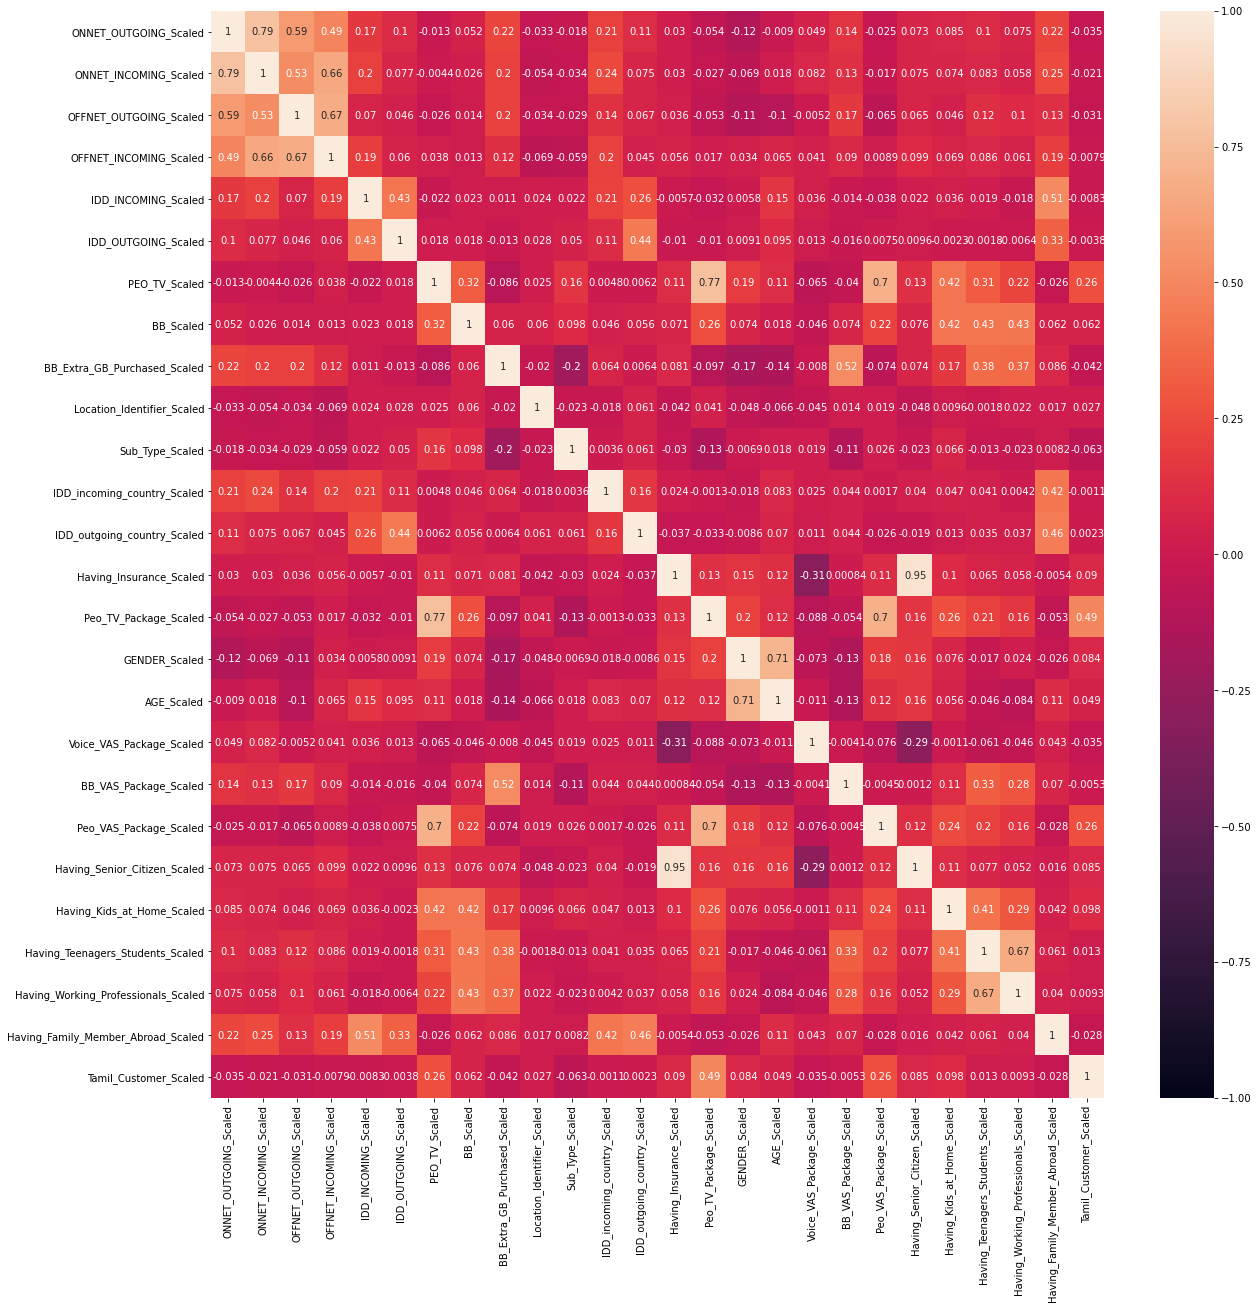

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [51]:
x= data.values

# Clustering Users with Scaled features

## Agglomerative Clustering and Dendrogram
- Hierarchical Clustering

In [52]:
result=shc.linkage(x, method="ward",)

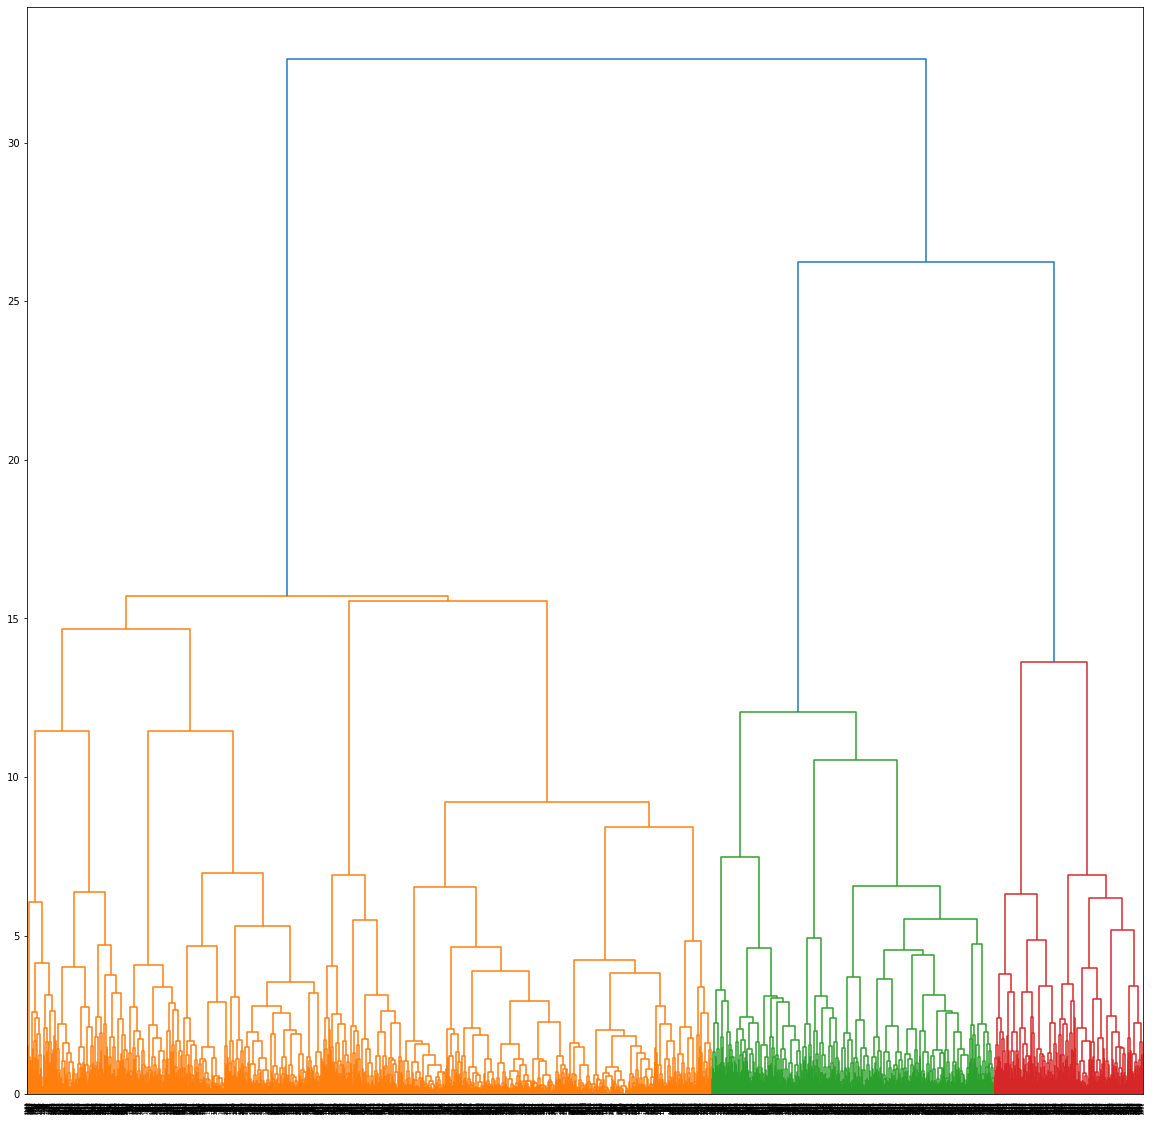

In [53]:
plt.figure(figsize=(20,20))
shc.dendrogram(result)
plt.show()

In [54]:
acl=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [55]:
acl.fit(x)

AgglomerativeClustering(n_clusters=3)

In [56]:
# cluster labels
acl.labels_

array([0, 0, 2, ..., 0, 0, 2])

### User counts in each cluster

In [57]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(acl.labels_)))

{0: 1842, 1: 399, 2: 759}

# K-Means Clustering

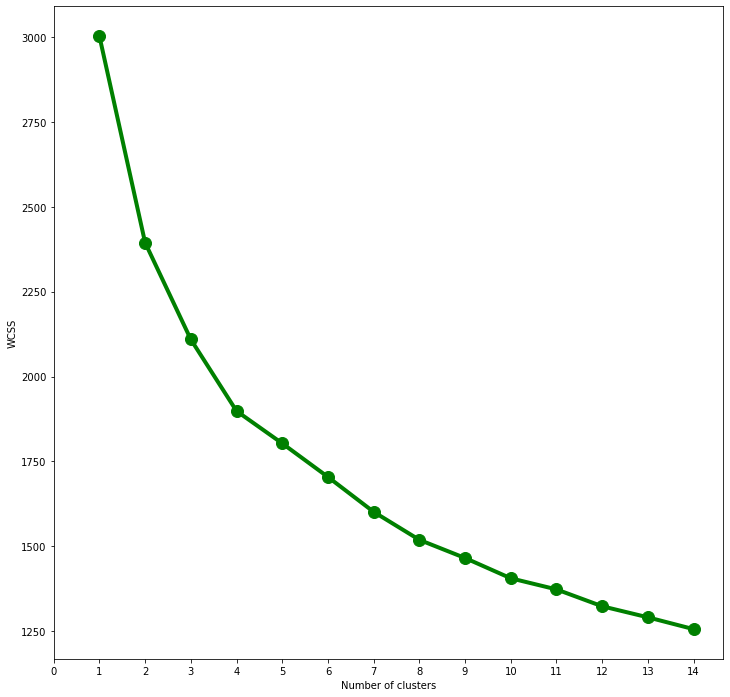

In [58]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,15):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (12,12))
plt.plot(range(1,15),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(15))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [59]:
# since elbow occured at 3, let's consider 3 clusters
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [60]:
y_clusters

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [61]:
model.labels_

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [62]:
cluster_labels=[1,0,2]
dict(zip(cluster_labels,np.bincount(model.labels_)))

{1: 757, 0: 1834, 2: 409}

In [63]:
model.cluster_centers_

array([[ 9.19458679e-02,  9.45676888e-02,  9.62144721e-02,
         1.09753585e-01,  3.85292823e-02,  1.67665888e-02,
         6.74149604e-01,  2.29785887e-01,  5.14781579e-03,
         5.11959302e-01,  9.39894320e-01,  2.71786771e-01,
         8.71862616e-02,  2.77555756e-16,  5.82701801e-01,
         1.47820343e-01,  3.61074417e-01,  8.04809916e-01,
         2.38606341e-02,  4.24528958e-01,  2.77410832e-03,
         2.10039630e-02,  1.99471598e-02,  1.99471598e-02,
         2.81373844e-02,  1.61162483e-02],
       [ 1.02365325e-01,  9.90717724e-02,  1.10259838e-01,
         1.04872797e-01,  4.86897492e-02,  1.52068828e-02,
         2.02767176e-03,  8.64183857e-02,  2.07315835e-02,
         5.06902712e-01,  8.82360960e-01,  2.81795297e-01,
         9.30730133e-02, -2.77555756e-16,  4.87573897e-02,
         1.11014177e-01,  2.95528899e-01,  8.22703350e-01,
         4.07579062e-02,  3.34902141e-02,  9.26935660e-04,
         1.85387132e-03,  3.70774264e-03,  6.43402399e-03,
         3.08

# Applying PCA for visualization purposes

### Find most approporiate no of components

In [64]:
pc=PCA(n_components=26) # 23
pc.fit(x)

PCA(n_components=26)

In [65]:
#How much variance,caputured individually
pc.explained_variance_

array([2.30588637e-01, 1.37060834e-01, 1.32874443e-01, 7.90722656e-02,
       6.58453770e-02, 6.43616519e-02, 6.15779393e-02, 5.11058162e-02,
       4.65255236e-02, 3.17792458e-02, 2.44246257e-02, 2.01907143e-02,
       1.58072698e-02, 1.33625082e-02, 6.72356652e-03, 5.35031391e-03,
       4.07513619e-03, 3.04586740e-03, 2.94061886e-03, 1.45268358e-03,
       1.08054201e-03, 8.58084368e-04, 5.41392076e-04, 4.05858952e-04,
       2.73754082e-04, 1.14338107e-04])

In [66]:
#How mucb variance, captured together
pc.explained_variance_ratio_.cumsum() 

array([0.23025729, 0.36712118, 0.49980469, 0.57876333, 0.6445141 ,
       0.70878326, 0.77027272, 0.8213051 , 0.86776377, 0.89949735,
       0.92388688, 0.94404858, 0.95983314, 0.97317644, 0.97989035,
       0.98523297, 0.98930225, 0.99234375, 0.99528014, 0.99673073,
       0.99780972, 0.99866658, 0.99920719, 0.99961247, 0.99988583,
       1.        ])

/home/chiran/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



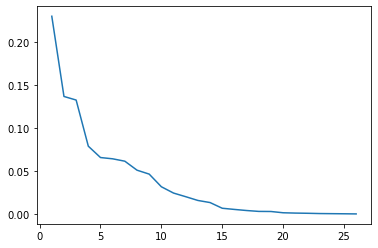

In [67]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

### n=2 for 2D visualizations

In [68]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_2d = PCA(n_components=2)
pca_2d.fit(x)
reduced_data = pca_2d.fit_transform(x)
results_2d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_2d_df[['pca1','pca2']] = scaler.fit_transform(results_2d_df[['pca1','pca2']])

results = results_2d_df.values

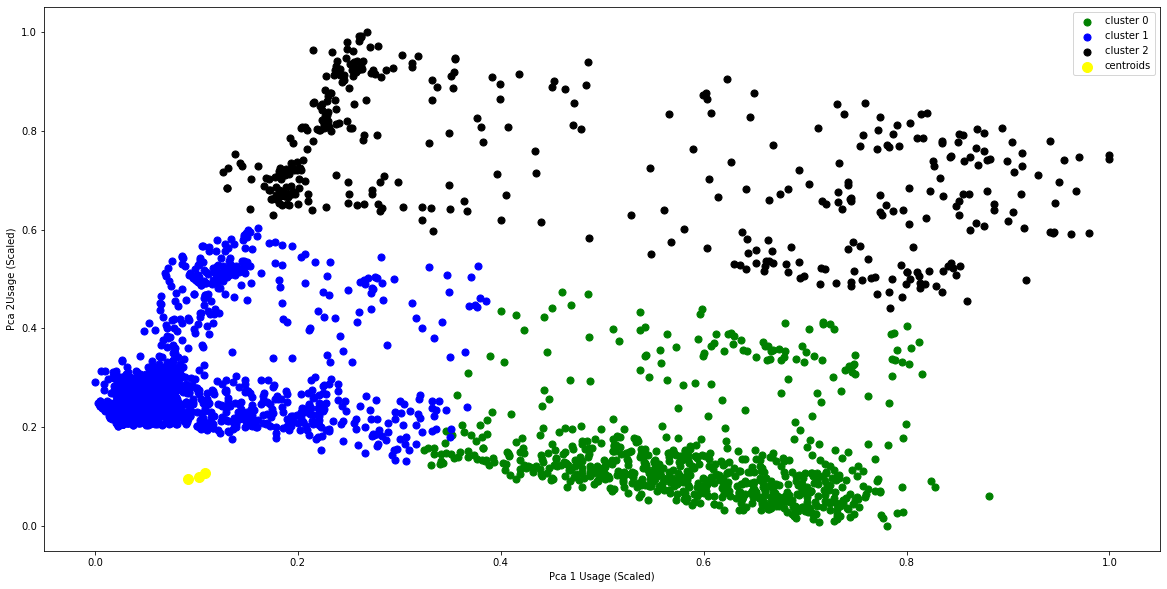

In [69]:
plt.figure(figsize = (20,10))
plt.scatter(results[y_clusters == 0,0],results[y_clusters == 0,1],s = 50, c = 'green', label = "cluster 0")
plt.scatter(results[y_clusters == 1,0],results[y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 1")
plt.scatter(results[y_clusters == 2,0],results[y_clusters == 2,1],s = 50, c = 'black', label = "cluster 2")
#plt.scatter(results[y_clusters == 3,0],results[y_clusters == 3,1],s = 50, c = 'red', label = "cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Pca 1 Usage (Scaled)")
plt.ylabel("Pca 2Usage (Scaled)")
plt.legend()
plt.show()

### Using 3D visualization to visualize cluster densities more clearlity (n=3)

In [70]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_3d = PCA(n_components=3)
pca_3d.fit(x)
reduced_data = pca_3d.fit_transform(x)
results_3d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_3d_df[['pca1','pca2','pca3']] = scaler.fit_transform(results_3d_df[['pca1','pca2','pca3']])

results_3d = results_3d_df.values

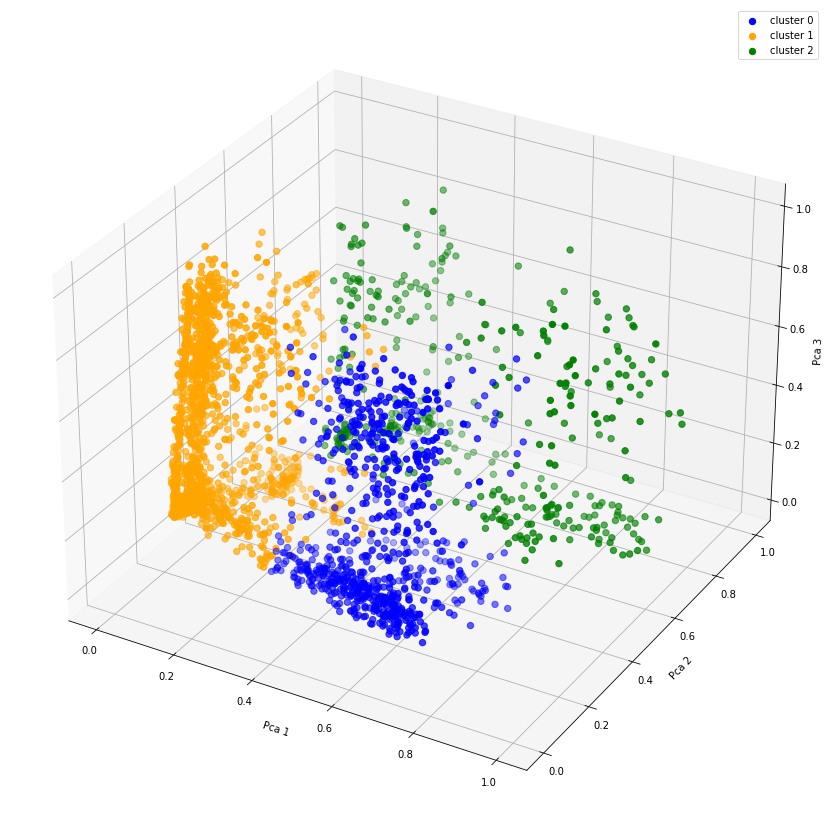

In [71]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_3d[y_clusters == 0,0],results_3d[y_clusters == 0,1],results_3d[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(results_3d[y_clusters == 1,0],results_3d[y_clusters == 1,1],results_3d[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(results_3d[y_clusters == 2,0],results_3d[y_clusters == 2,1],results_3d[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
#ax.scatter(results_3d[y_clusters == 3,0],results_3d[y_clusters == 3,1],results_3d[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 2")
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
ax.set_zlabel('Pca 3')
ax.legend()
plt.show()

In [72]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Adding clusters column to existing user profile

In [73]:
user_profile["Cluster"] = y_clusters

In [74]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 88 to 20022
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   event_source.hash                    3000 non-null   object 
 1   ACCOUNT_NUM.hash                     3000 non-null   object 
 2   CUSTOMER_REF.hash                    3000 non-null   object 
 3   ONNET_OUTGOING_Categorical           3000 non-null   object 
 4   ONNET_OUTGOING_Scaled                3000 non-null   float64
 5   ONNET_OUTGOING_Outlier               3000 non-null   object 
 6   ONNET_INCOMING_Categorical           2890 non-null   object 
 7   ONNET_INCOMING_Scaled                2890 non-null   float64
 8   ONNET_INCOMING_Outlier               2890 non-null   object 
 9   OFFNET_OUTGOING_Categorical          2886 non-null   object 
 10  OFFNET_OUTGOING_Scaled               2886 non-null   float64
 11  OFFNET_OUTGOING_Outlier     

In [75]:
user_profile.to_csv("data/user_profile/prepared/User_Profile_reduced_with_clusters.csv")